### Possession 비율 그래프

#### 1. 필요 라이브러리 & 데이터 불러오기

In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer.pitch import Pitch
import matplotlib.patches as patches

# 한글 오류
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [33]:
player_data = pd.read_csv(r"C:\krpython\adios-video\adios-video\Kyungran\player_data.csv", index_col=0)
player_data

,player_id,team,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,OJY,1,True,오지영,848.676147,254.649963,999.746338,504.151428
1,SMJ,1,False,손명준,279.895325,97.888031,357.484161,327.861938
2,KSW,1,False,김성욱,483.955444,90.242813,542.665527,220.719711
3,SDG,1,False,신대근,895.455933,161.566589,974.598022,312.147797
4,SHW,0,False,서한울,326.304718,235.089401,406.512360,451.280579
...,...,...,...,...,...,...,...,...
9627,SMJ,1,False,손명준,560.619324,182.539291,627.530457,343.382141
9628,KYS,0,False,가윤성,690.812683,136.451675,746.687439,269.790375
9629,OJY,1,False,오지영,23.902245,237.278000,124.417290,404.449188
9630,SDG,1,False,신대근,380.786072,189.538803,441.598999,370.852539


In [36]:
# 공 갖고 있는 사람에 대해서만 필터

player_data = player_data[player_data['has_ball'] == True]
player_data

,player_id,team,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,OJY,1,True,오지영,848.676147,254.649963,999.746338,504.151428
8,OJY,1,True,오지영,853.333923,256.160553,1003.642334,504.065369
16,OJY,1,True,오지영,855.155640,256.869446,1009.156189,510.257690
24,OJY,1,True,오지영,857.745728,260.070618,1016.403748,520.100830
32,OJY,1,True,오지영,862.458252,262.111481,1022.559448,523.347595
...,...,...,...,...,...,...,...,...
9593,KDW,0,True,강동욱,862.002075,211.439011,954.548218,443.666687
9601,KDW,0,True,강동욱,869.020813,210.086517,961.985657,440.599579
9609,KDW,0,True,강동욱,870.485901,205.159622,965.886597,439.252045
9617,KDW,0,True,강동욱,867.890015,197.848587,967.339233,437.722687


#### 2. 데이터 전처리

##### 1) 좌표 중앙값 계산

In [37]:
player_data['x'] = (player_data['bbox_x1'] + player_data['bbox_x2']) /2  # 세로
player_data['y'] = (player_data['bbox_y1'] + player_data['bbox_y2']) / 2 # 가로

print(player_data['x'].head(3))
print(player_data['y'].head(3))

0     924.211243
8     928.488129
16    932.155914
Name: x, dtype: float64
0     379.400696
8     380.112961
16    383.563568
Name: y, dtype: float64


In [54]:
player_data

,player_id,team,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2,x,y
0,OJY,1,True,오지영,848.676147,254.649963,999.746338,504.151428,924.211243,379.400696
8,OJY,1,True,오지영,853.333923,256.160553,1003.642334,504.065369,928.488129,380.112961
16,OJY,1,True,오지영,855.155640,256.869446,1009.156189,510.257690,932.155914,383.563568
24,OJY,1,True,오지영,857.745728,260.070618,1016.403748,520.100830,937.074738,390.085724
32,OJY,1,True,오지영,862.458252,262.111481,1022.559448,523.347595,942.508850,392.729538
...,...,...,...,...,...,...,...,...,...,...
9593,KDW,0,True,강동욱,862.002075,211.439011,954.548218,443.666687,908.275146,327.552849
9601,KDW,0,True,강동욱,869.020813,210.086517,961.985657,440.599579,915.503235,325.343048
9609,KDW,0,True,강동욱,870.485901,205.159622,965.886597,439.252045,918.186249,322.205833
9617,KDW,0,True,강동욱,867.890015,197.848587,967.339233,437.722687,917.614624,317.785637


##### 2) 팀 구분 짓기

In [39]:
# 팀 구분
team_a = player_data[player_data['team']==0]
team_b = player_data[player_data['team']==1]

In [43]:
player_data['y'].max()

589.6683349609375

In [53]:
player_data['x'].max()

1220.1663208007812

In [42]:
420*3

1260

##### 3) 영역 지정

In [55]:
# 가로 기준 시각화
# team a 영역 지정
team_a['region_y'] = pd.cut(team_a['y'], bins = [0, 200, 400, 600], labels=['Left Side', 'Middle', 'Right Side'])

# team b 영역 지정
team_b['region_y'] = pd.cut(team_b['y'], bins = [0, 200, 400, 600], labels=['Right Side', 'Middle', 'Left Side'])

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12824\1260715687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_a['region_y'] = pd.cut(team_a['y'], bins = [0, 200, 400, 600], labels=['Left Side', 'Middle', 'Right Side'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_12824\1260715687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_b['region_y'] = pd.cut(team_b['y'], bins = [0, 200, 400, 600], labels=['Right Side', 'Middle', 'Left Side'])


In [56]:
# 세로 기준 시각화
# team a 영역 지정
team_a['region_x'] = pd.cut(team_a['x'], bins=[0, 420, 840, 1260], labels=['Deffensive', 'Middle', 'Offensive'])

# team b 영역 지정
team_b['region_x'] = pd.cut(team_b['x'], bins=[0, 420, 840, 1260], labels=['Offensive', 'Middle', 'Deffensive'])

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12824\559545915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_a['region_x'] = pd.cut(team_a['x'], bins=[0, 420, 840, 1260], labels=['Deffensive', 'Middle', 'Offensive'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_12824\559545915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_b['region_x'] = pd.cut(team_b['x'], bins=[0, 420, 840, 1260], labels=['Offensive', 'Middle', 'Deffensive'])


##### 4) 팀 영역별 비율 계산

In [57]:
# 가로 기준 
team_a_distribution_y = team_a['region_y'].value_counts(normalize=True)*100 # 영역 비율 계산
team_a_distribution_y = team_a_distribution_y.reindex(['Left Side', 'Middle', 'Right Side']) # 위치 고정

team_b_distribution_y = team_b['region_y'].value_counts(normalize=True)*100
team_b_distribution_y = team_b_distribution_y.reindex(['Right Side', 'Middle', 'Left Side'])

print(team_a_distribution_y)
print('---')
print(team_b_distribution_y)

region_y
Left Side     13.986014
Middle        76.223776
Right Side     9.790210
Name: proportion, dtype: float64
---
region_y
Right Side    25.071225
Middle        70.655271
Left Side      4.273504
Name: proportion, dtype: float64


In [58]:
# 세로 기준 
team_a_distribution_x = team_a['region_x'].value_counts(normalize=True)*100 # 영역 비율 계산
team_a_distribution_x = team_a_distribution_x.reindex(['Deffensive', 'Middle', 'Offensive']) 

# 위치 고정
team_b_distribution_x = team_b['region_x'].value_counts(normalize=True)*100
team_b_distribution_x = team_b_distribution_x.reindex(['Offensive', 'Middle', 'Deffensive'])

print(team_a_distribution_x)
print('---')
print(team_b_distribution_x)

region_x
Deffensive    18.881119
Middle        62.587413
Offensive     18.531469
Name: proportion, dtype: float64
---
region_x
Offensive     26.210826
Middle        37.606838
Deffensive    36.182336
Name: proportion, dtype: float64


Text(0.7, 1.02, 'team_b')

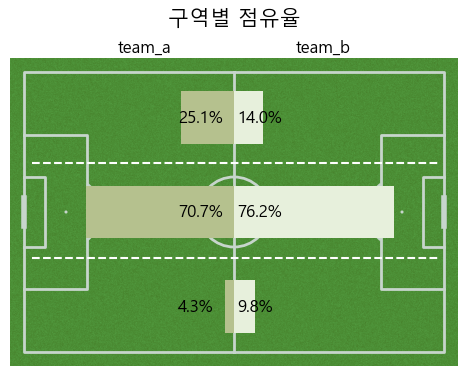

In [66]:
# 축구장 시각화 설정
fig, ax = plt.subplots(figsize=(8, 4))
fig.set_facecolor('#FFFFFF')
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc')

# 각 축구장 그리기
pitch.draw(ax)

# 막대 너비 및 최대 길이 설정
bar_height = 15
max_length = 60  # 막대 최대 길이 설정
bar_spacing = 27  # 막대 간격 축소


# team_a 막대 그래프 그리기
for idx, (region, value) in enumerate(team_a_distribution_y.items()):
    if value > 0 or region in ['Left Side', 'Right Side', 'Middle']:
        y_start = 13 + (idx * bar_spacing)  # 막대 시작 위치 y 좌표
        #y_start = 10 + (idx * 30)  # 막대 시작 위치 y 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.barh(y_start, length, height=bar_height, left=60, color='#E7F0DC',) #edgecolor='black')  # 막대 그리기 left : x좌표 이동
        ax.text(61, y_start, f'{value:.1f}%', color='black', va='center', fontsize=12)  # 비율 텍스트
        if idx < len(team_a_distribution_y) - 1:
            ax.axhline(y=y_start + 13, xmin=0.05, xmax=0.96, color='white', linestyle='--')

# team_b 막대 그래프 그리기
for idx, (region, value) in enumerate(team_b_distribution_y.items()):
    if value > 0 or region in ['Right Side', 'Left Side', 'Middle']:
        y_start = 13 + (idx * bar_spacing)  # 막대 시작 위치 y 좌표
        #y_start = 10 + (idx * 30)  # 막대 시작 위치 y 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.barh(y_start, -length, height=bar_height, left=60, color='#B5C18E',)  # 막대 그리기
        ax.text(44 , y_start, f'{value:.1f}%', color='black', va='center', fontsize=12)  # 비율 텍스트
             
plt.title('구역별 점유율\n', fontsize=15 )
ax.text(0.3, 1.02, 'team_a', transform=ax.transAxes, fontsize=12, ha='center')
ax.text(0.7, 1.02, 'team_b', transform=ax.transAxes, fontsize=12, ha='center')

Text(100, 70, 'Away Third')

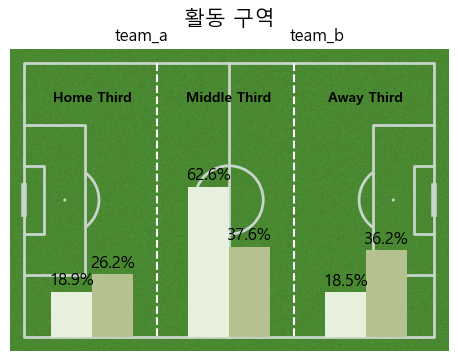

In [68]:
## 2번째 subplot 

fig, ax = plt.subplots(figsize=(8,4))
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc')
pitch.draw(ax)


# 축구장의 y축 범위를 설정하여 하단에 맞추기
ax.set_ylim(-5, 85)

# 막대 너비 및 최대 길이 설정
bar_width = 12
max_length = 70  # 막대 최대 길이 설정
bar_spacing = 40  # 막대 간격 축소
base_line = 20  # 기준선 설정 (축구장의 하단에 맞추기 위해 Y 좌표를 사용)

# 팀 A 막대 그래프 그리기
for idx, (region, value) in enumerate(team_a_distribution_x.items()):
    if value > 0 or region in ['Deffensive', 'Offensive Side', 'Middle']:
        x_start = base_line + (idx * bar_spacing)  # 막대 시작 위치 x 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.bar(x_start - bar_width, length, width=bar_width, bottom=0, color='#E7F0DC', align='edge')  # 막대 그리기
        ax.text(x_start - bar_width / 2, length + 1, f'{value:.1f}%', color='black', ha='center', va='bottom', fontsize=12)  # 비율 텍스트
        if idx < len(team_a_distribution_x) -1:
            ax.axvline(x=x_start + bar_width + 7, color='white', linestyle='--', ymin=0.06, ymax=0.95)

# 팀 B 막대 그래프 그리기
for idx, (region, value) in enumerate(team_b_distribution_x.items()):
    if value > 0:
        x_start = base_line + (idx * bar_spacing)  # 막대 시작 위치 x 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.bar(x_start, length, width=bar_width, bottom=0, color='#B5C18E', align='edge')  # 막대 그리기
        ax.text(x_start + bar_width / 2, length + 1, f'{value:.1f}%', color='black', ha='center', va='bottom', fontsize=12)  # 비율 텍스트


# subplot 제목 추가
ax.set_title('활동 구역', fontsize=15, color='black', pad=15)

# 팀 텍스트 추가
ax.text(0.3, 1.02, 'team_a', transform=ax.transAxes, fontsize=12, ha='center')
ax.text(0.7, 1.02, 'team_b', transform=ax.transAxes, fontsize=12, ha='center')

# 활동 구역 텍스트 추가
ax.text(20, 70, "Home Third", ha='center', va='center', fontsize=10, color='black', weight='bold')
ax.text(60, 70, "Middle Third", ha='center', va='center', fontsize=10, color='black', weight='bold')
ax.text(100, 70, "Away Third", ha='center', va='center', fontsize=10, color='black', weight='bold')
